In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler

### Pandas dataframe

In [4]:
dc = pd.read_csv("event.csv")
df = dc.loc[(dc.Date >= '4/29/2019') & (dc.Date <= '5/5/2019')] 

### Apply K-means

C:\Users\neshragh\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


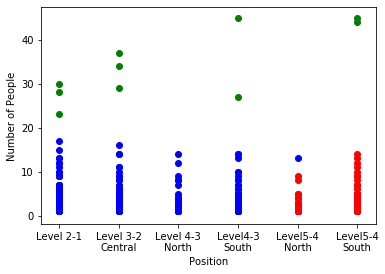

In [5]:

km = KMeans(n_clusters = 4)
y_pre = km.fit_predict(df[['Position', 'Count']])
df['cluster'] = y_pre
df1 = df[df.cluster ==1]
df2 = df[df.cluster ==2]
df0 = df[df.cluster ==0]
df3 = df[df.cluster ==3]

plt.xticks([1,2,3,4,5,6], ["Level 2-1", "Level 3-2\nCentral", "Level 4-3\nNorth",
            "Level4-3\nSouth", "Level5-4\nNorth", "Level5-4\nSouth"])
plt.xlabel('Position')
plt.ylabel('Number of People')


plt.scatter(df1.Position, df1['Count'], color= 'red')
plt.scatter(df2.Position, df2['Count'], color= 'green')
plt.scatter(df0.Position, df0['Count'], color= 'blue')
plt.scatter(df3.Position, df3['Count'], color= 'blue')

### Preprocessing to remove outliers or having a better results

In [7]:
# sc = MinMaxScaler()
# sc.fit(df[['Count']])
# df['Count'] = sc.transform(df['Count'])
# 
# 
# sc.fit(df.Position)
# df.Position = sc.transform(df.Position)
# 

### ELBOW METHOD: finding the number of clusters

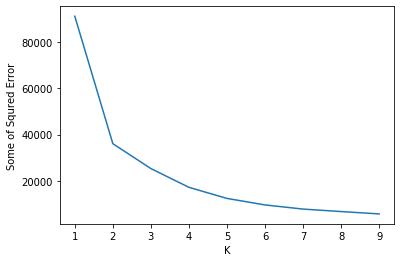

In [8]:
k_r = range(1,10)
sse =[]
for k in k_r:
    km = KMeans(n_clusters=k)
    km.fit(df[['Position', 'Count']])
    sse.append(km.inertia_)
    
plt.xlabel('K')
plt.ylabel('Some of Squred Error')
plt.plot(k_r, sse)   

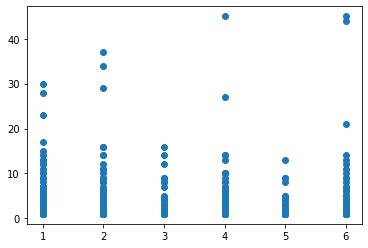

In [11]:
plt.scatter(dc.Position, dc.Count)
